In [10]:
import pandas as pd

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
data_frame = pd.read_excel("test.xlsx")

In [13]:
data_frame.head()

,Title,Publish Date,Section,Tags,Sort (Views),Visitors,Views,Engaged Minutes,Shares,Desktop Views,...,Search Refs,Internal Refs,Other Refs,Direct Refs,New Vis,Returning Vis,Views New Vis.,Views Ret. Vis.,Minutes New Vis.,Minutes Ret. Vis.
0,Qué siente un bebé en el vientre cuando la mad...,2014-06-19 19:00:00,Familia,"vida sexual femenina,comunicacion con el bebe,...",2032660,1799957,2032660,1909892,19566,403304,...,26666,26441,522790,600407,1391120,429155,1537286,495372,1479120,430771
1,17 tatuajes que toda mujer amaría tener,2015-05-21 08:00:00,Belleza,"piel,cuidados de la piel,Mujeres,tatuajes",1781700,1360538,1781700,1348435,93632,350615,...,31624,49391,53252,493505,1020454,407702,1183943,597756,902278,446156
2,Las mejores posiciones sexuales según Esperanz...,2014-10-29 16:47:00,Pareja,"mujeres sexys,sexualidad,Actrices,el estilo de...",1161996,919771,1161996,1532956,2056,12840,...,5904,560,1095115,48168,635002,315815,763930,398064,1027991,504965
3,4 posiciones para el sexo oral,2014-05-23 08:56:00,Pareja,"sexualidad,tips,sexo",925858,774496,925858,722693,1441,79193,...,184530,248227,309763,132809,523292,257296,597597,328261,467838,254854
4,22 famosas que lucen HERMOSAS sin maquillaje,2015-07-31 23:00:00,Famosos,"fotos de famosos,fotos de celebridades,famosas...",882087,750048,882087,793876,35294,244990,...,2478,2505,22312,113418,595509,169403,668436,213651,593643,200232


In [14]:
data_frame.columns

Index([            u'Title',      u'Publish Date',           u'Section',
                    u'Tags',      u'Sort (Views)',          u'Visitors',
                   u'Views',   u'Engaged Minutes',            u'Shares',
           u'Desktop Views',      u'Mobile Views',      u'Tablet Views',
             u'Social Refs',       u'Search Refs',     u'Internal Refs',
              u'Other Refs',       u'Direct Refs',           u'New Vis',
           u'Returning Vis',    u'Views New Vis.',   u'Views Ret. Vis.',
        u'Minutes New Vis.', u'Minutes Ret. Vis.'],
      dtype='object')

# Top 10 Tags por # Shares

In [15]:
tags = data_frame.sort("Shares",ascending=False)

In [16]:
tags['Tags'][0]

u'vida sexual femenina,comunicacion con el bebe,Curiosidades,sexo,cuidados del bebe,size-m'

# Top digitos en listas ordenado por # Shares 

In [17]:
data_frame['digit'] = data_frame['Title'].apply(lambda x: int(x.split(" ")[0]) if x.split(" ")[0].isdigit() else 0)

In [18]:
digit = data_frame.sort("Shares",ascending=False)

In [19]:
print digit['digit'].unique()

[ 9 15 10  0 17  7 20  5  6 22 14 13 12 28  8 11  4  3]


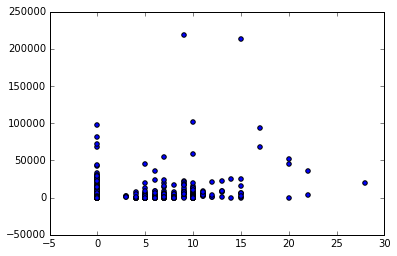

In [20]:
plt.figure()
plt.scatter(data_frame['digit'],data_frame['Shares'])

# ¿Existe alguna relación entre el número de palabras en el Título y el Total de Shares? 

In [21]:
data_frame['title_word_count'] = data_frame['Title'].apply(lambda x: len(x.split(" ")))

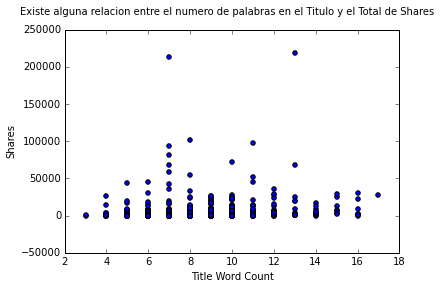

In [22]:
plt.scatter(data_frame['title_word_count'],data_frame['Shares'])
plt.suptitle("Existe alguna relacion entre el numero de palabras en el Titulo y el Total de Shares")
plt.xlabel('Title Word Count')
plt.ylabel("Shares")

# Pudiese haber una relacion entre la cantidad de palabras en el titulo y los shares, viendo que si el titulo tiene entre 7 a 11 palabras, puede irle bastante bien

# ¿Existe alguna relación entre el número de palabras en el Título y el Total de Pageviews? 

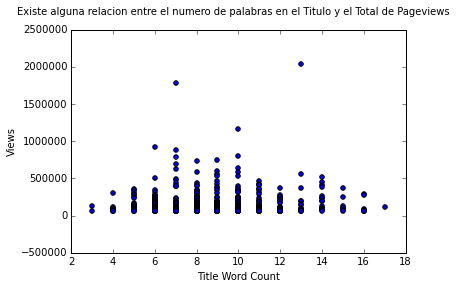

In [23]:
plt.scatter(data_frame['title_word_count'],data_frame['Views'])
plt.suptitle("Existe alguna relacion entre el numero de palabras en el Titulo y el Total de Pageviews")
plt.xlabel('Title Word Count')
plt.ylabel("Views")

# Igual que antes, parece haber una relacion en el titulos pequeños y los clicks que se les da. Parece que lo mejor es tener un titulo de 8 a 11 palabras como maximo

# ¿Comentarios o Descubrimientos Adicionales?

# Palabras importantes en los titulos

In [24]:
from collections import Counter

In [25]:
import numpy as np

In [26]:
from itertools import chain

In [27]:
import nltk

In [28]:
nltk.download()

showing info http://www.nltk.org/nltk_data/


True

In [34]:
from nltk.corpus import stopwords

In [84]:
data_frame = data_frame.sort("Shares",ascending=False)

In [85]:
def removeStopWords( words ):
     return [ word for word in words if word.lower()  not in stopwords.words('spanish') and not word.isdigit()]

In [89]:
words = [removeStopWords(a.split(" ")) for a in data_frame['Title'][0:100]]

In [90]:
result = Counter(chain.from_iterable(words))

In [91]:
print result

Counter({u'tatuajes': 16, u'ideas': 7, u'mujeres': 6, u'madre': 5, u'trenzas': 5, u'cabello': 4, u'trucos': 4, u'mujer': 4, u'cosas': 4, u'reciclar': 4, u'largo': 3, u'deber\xedas': 3, u'Si': 3, u'robar\xe1n': 3, u'mejores': 3, u'maquillaje': 3, u'hogar': 3, u'Mira': 3, u'\xbfQu\xe9': 3, u'beb\xe9': 3, u'solo': 3, u'razones': 3, u'tatuaje': 3, u'tiernos': 3, u'hacer': 3, u'ojos': 3, u'C\xf3mo': 3, u'hermosas': 2, u'menos': 2, u'seg\xfan': 2, u'significados': 2, u'tipo': 2, u'AMIGAS': 2, u't\xe9': 2, u'ejercicios': 2, u'puede': 2, u'curiosos': 2, u'minutos': 2, u'peque\xf1os': 2, u'abdomen': 2, u'vientre': 2, u'truco': 2, u'frases': 2, u'toda': 2, u'cada': 2, u'lugares': 2, u'ideal': 2, u'hombres': 2, u'amas': 2, u'tatuarte': 2, u'cama': 2, u'perritos': 2, u'tener': 2, u'necesitas': 2, u'lucir': 2, u'compartir': 2, u'TODAS': 2, u'se\xf1ales': 2, u'puedes': 2, u'Halloween': 2, u'Ideas': 2, u'signos': 2, u'vida': 2, u'chico': 2, u'peinados': 2, u'pelo': 2, u'\xbfSab\xedas': 2, u'M\xedS': 

# Por tamaño, muestro las 20 palabras mas frecuentes

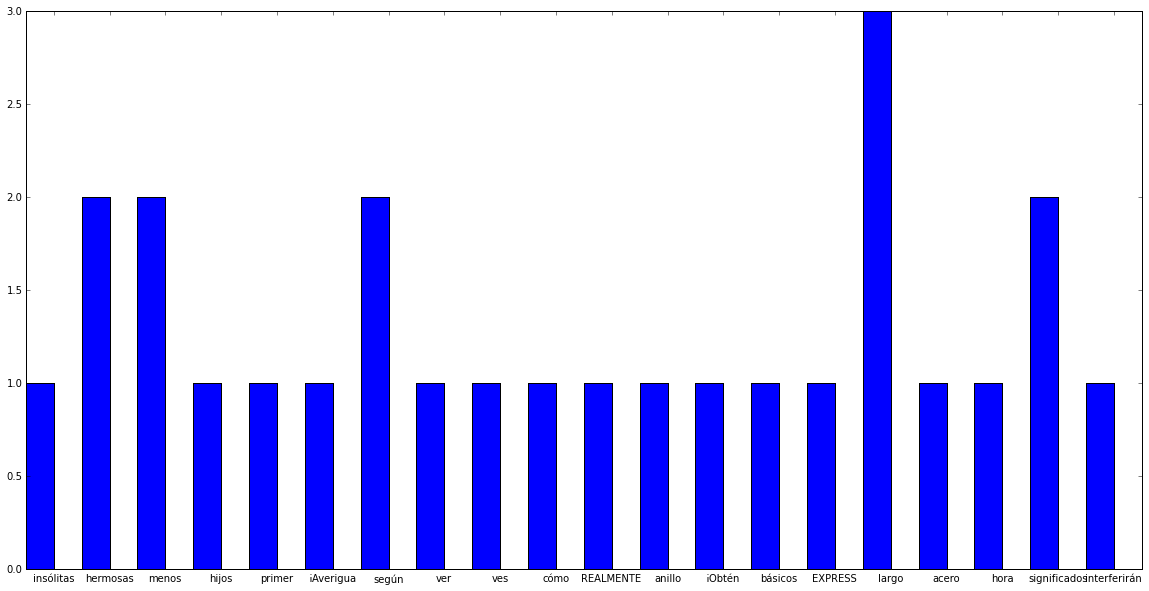

In [92]:
plt.figure(figsize=(20,10))
words = result.keys()[0:20]
counts = result.values()[0:20]
indexes = np.arange(len(words))
width = 0.5
plt.bar(indexes,counts, width)
plt.xticks(indexes + width , words)
plt.show()

# Los 100 mejores post, usaron palabras como hermosa, insolitas, segun (insinu